In [11]:
import pandas as pd
train_data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [12]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


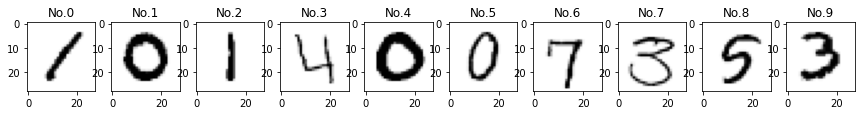

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
for i in range(10):
    plt.subplot(20, 20, i+1)
    plt.title("No." + str(i))
    plt.imshow(train_data.iloc[:,1:].iloc[i].values.reshape(28,28),cmap='Greys')

In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
x=np.array(train_data.iloc[:,1:785])
y=np.array(train_data["label"])
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.3, random_state=42)

In [15]:
from sklearn.neural_network import MLPClassifier
deep_learning = MLPClassifier(random_state=123,verbose=True)
deep_learning.fit(x_train, y_train)

Iteration 1, loss = 4.60506896
Iteration 2, loss = 1.52357173
Iteration 3, loss = 0.88867753
Iteration 4, loss = 0.59759801
Iteration 5, loss = 0.43795579
Iteration 6, loss = 0.32276047
Iteration 7, loss = 0.24140176
Iteration 8, loss = 0.17451899
Iteration 9, loss = 0.15465885
Iteration 10, loss = 0.11094009
Iteration 11, loss = 0.10410280
Iteration 12, loss = 0.08813126
Iteration 13, loss = 0.07254557
Iteration 14, loss = 0.06568002
Iteration 15, loss = 0.07492754
Iteration 16, loss = 0.10325556
Iteration 17, loss = 0.09758681
Iteration 18, loss = 0.08058213
Iteration 19, loss = 0.07800096
Iteration 20, loss = 0.07467045
Iteration 21, loss = 0.06997184
Iteration 22, loss = 0.06463901
Iteration 23, loss = 0.07997914
Iteration 24, loss = 0.07915568
Iteration 25, loss = 0.08642254
Iteration 26, loss = 0.09420731
Iteration 27, loss = 0.08168214
Iteration 28, loss = 0.08784503
Iteration 29, loss = 0.07744866
Iteration 30, loss = 0.06735948
Iteration 31, loss = 0.06214101
Iteration 32, los

MLPClassifier(random_state=123, verbose=True)

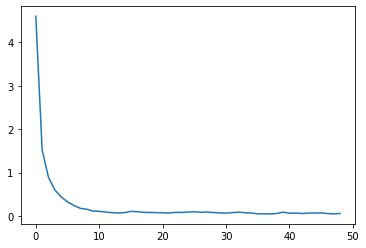

In [16]:
plt.plot(deep_learning.loss_curve_)

In [17]:
valid_test=deep_learning.predict(x_valid)

In [18]:
valid_test_result=pd.concat([pd.DataFrame(valid_test),pd.DataFrame(y_valid)], axis=1)
valid_test_result.columns=["prediction","correct label"]
valid_test_result

,prediction,correct label
0,8,8
1,1,1
2,9,9
3,9,9
4,8,8
...,...,...
12595,0,0
12596,3,3
12597,5,5
12598,5,5


The answer is 2 .


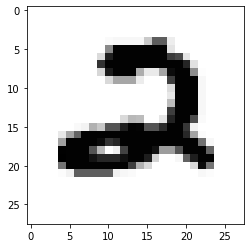

In [21]:
x_test=np.array(test_data)
y_pred_sample= deep_learning.predict(x_test[[0]])
print("The answer is",int(y_pred_sample),".")
plt.imshow(x_test[[0]].reshape(28,28),cmap='Greys')